# thực hành 2: Ảnh kỹ thuật số & màu

## 1. viết chương trình xử lí điểm ảnh 

### 1.1 biến đổi cường độ ảnh

[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


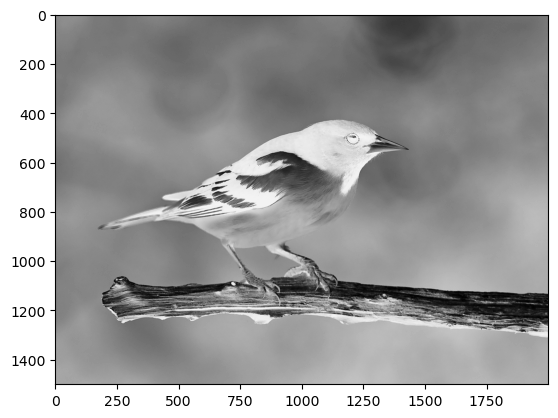

In [13]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')


im_1 = np.asarray(img)

im_2 = 255 - im_1

new_img = Image.fromarray(im_2)

print(im_2)
img.show()
plt.imshow(new_img, cmap= 'gray')
plt.show()


### 1.2 thay đổi chất lượng ảnh với Power law


C:\Users\US\AppData\Local\Temp\ipykernel_2288\3926163909.py:27: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


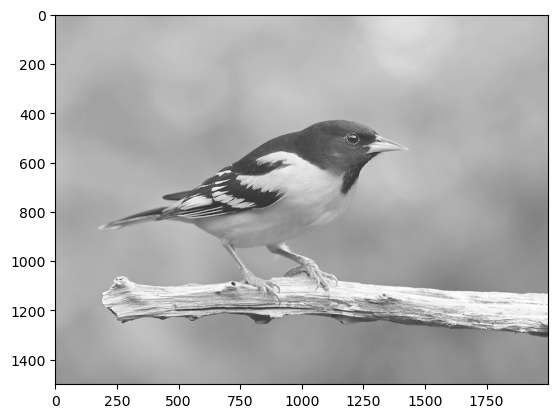

In [14]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# init gamma
gamma = 0.5

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# b3 is normalized
b3 = b1 / b2

# b2 gamma correction exponent is computed
b2 = np.log(b3) * gamma

# gamma correction is computed
c = np.exp(b2) * 255.0

# c is converted to type int
c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d , cmap= 'gray')
plt.show()


### 1.3 thay đổi cường độ điểm ảnh với Log Transformation

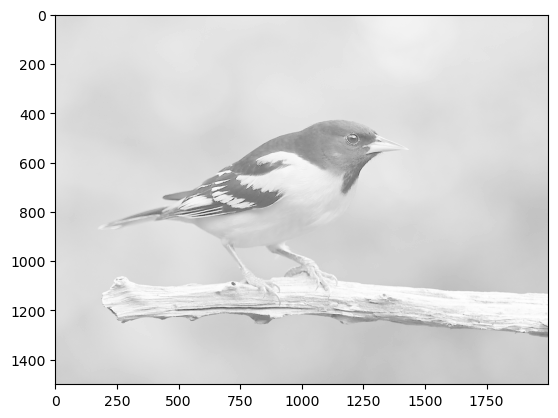

In [15]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


img = Image.open('bird.png').convert('L')


im_1 = np.asarray(img)


b1 = im_1.astype(float)


b2 = np.max(b1)


c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)


c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d , cmap= 'gray')
plt.show()


### 1.4 Histogram equalization

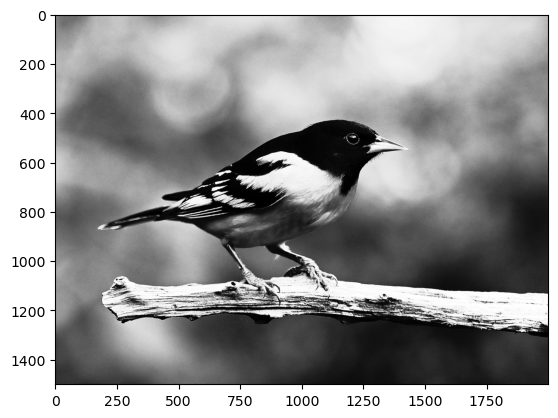

In [17]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')


im1 = np.asarray(img)


bl = im1.flatten()


hist, bins = np.histogram(im1, 256, [0, 255])


cdf = hist.cumsum()


cdf_m = np.ma.masked_equal(cdf, 0)


num_cdf = (cdf_m - cdf_m.min()) * 255
den_cdf = (cdf_m.max() - cdf_m.min())
cdf = num_cdf / den_cdf


cdf = np.ma.filled(cdf, 0).astype('uint8')


im2 = cdf[bl]


im3 = np.reshape(im2, im1.shape)


im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4 , cmap= 'gray')
plt.show()


### 1.5 thay đổi ảnh với Contras Stretching                                                                            

0 255


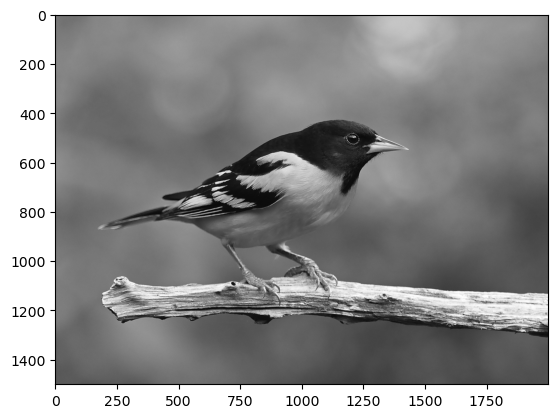

In [18]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


img = Image.open('bird.png').convert('L')


im1 = np.asarray(img)


a = im1.min()
b = im1.max()
print(a, b)


c = im1.astype(float)


im2 = 255 * ((c - a) / (b - a))


im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3 , cmap= 'gray')
plt.show()


### 1.6 biến đổi Fourier                        

#### 1.6.1 biến đổi ảnh với Fast Fourier

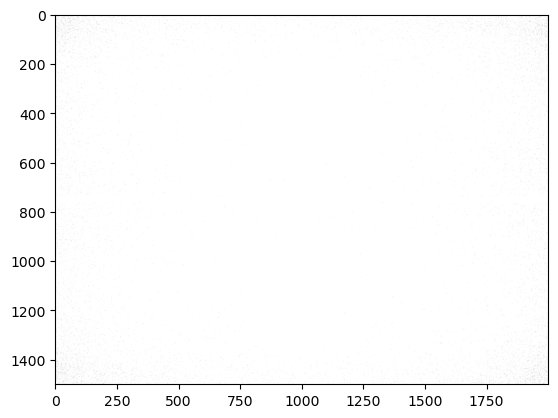

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


img = Image.open('bird.png').convert('L')


im1 = np.asarray(img)


c = abs(scipy.fftpack.fft2(im1))


d = scipy.fftpack.fftshift(c)
d = d.astype(float)


im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3)
plt.show()


#### 1.6.2 lọc ảnh trong miền tần suất

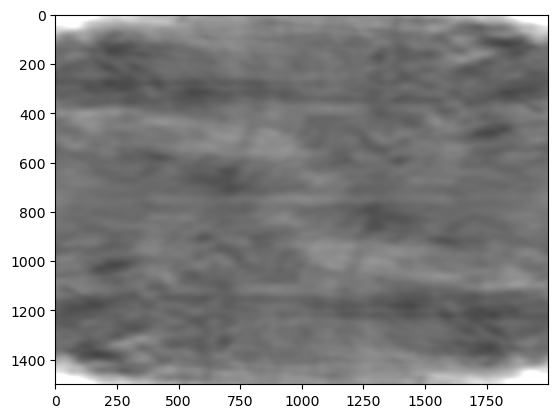

In [10]:
#Butterworth Lowpass Filter
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


img = Image.open('bird.png').convert('L')


im1 = np.asarray(img)


c = abs(scipy.fftpack.fft2(im1))


d = scipy.fftpack.fftshift(c)


M = d.shape[0]
N = d.shape[1]


H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  
t1 = 4  
t2 = 2 * t1


for i in range(0, M):
    for j in range(0, N):
        z1 = (i - center1) ** 2 + (j - center2) ** 2
       
        z = math.sqrt(z1)
        
        H[i, j] = 1 / (1 + (z / d_0) ** t1)


H = H.astype(float)
im2 = Image.fromarray(H)


com = d * H

e = abs(scipy.fftpack.ifft2(com))


e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()


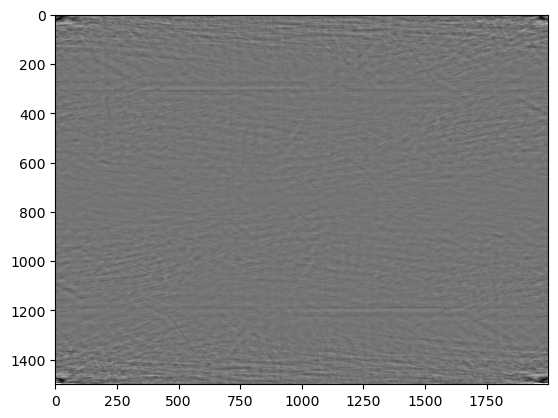

In [16]:
#Butterworth High Pass Filter
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


img = Image.open('bird.png').convert('L')


im1 = np.asarray(img)


c = abs(scipy.fftpack.fft2(im1))


d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]


H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  
t1 = 4 
t2 = 2 * t1


for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r != 0:
            H[i, j] = 1 / (1 + (d_0 / r) ** t2) 
H = H.astype(float)
H = Image.fromarray(H)
com = d * H
e = abs(scipy.fftpack.ifft2(com))

e = e.astype(float)
im3 = Image.fromarray(e)


img.show()
im3.show()
plt.imshow(im3, cmap='gray')

plt.show()
